<a href="https://colab.research.google.com/github/markerxz/naturalselection/blob/main/naturalselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
def simulation(sizei = 1000,sizej = 1000, n_food = 200, n_creature = 100,mutantvalue = 0.05,n_gen = 200,maxtime = 50): 
  import random
  import matplotlib.pyplot as plt
  from matplotlib import cm
  import numpy as np
  def genfood():
      foodzonei = [int(0 + sizei//10) , int(sizei - sizei//10)]
      foodzonej = [int(0 + sizej//10) , int(sizej - sizej//10)]
      food = []


      for j in range(n_food):
          food.append((random.uniform(foodzonei[0],foodzonei[1]),random.uniform(foodzonej[0],foodzonej[1])))
      return food
  import math
  def checkbound(offset,pos):
      
      i = offset[0]
      j = offset[1]
      if offset[0] + pos[0] > sizei:
          offset[0] = sizei - pos[0]
      if offset[0] + pos[0] < 0:
          offset[0] = (pos[0]*-1)
      if offset[1] + pos[1] > sizej:
          offset[1] = sizej - pos[1]
      if offset[1] + pos[1] < 0:
          offset[1] = (pos[1]*-1)
      return offset
      
  class Creatures:
      def randspawn(self):
          side = random.randint(1,4)
          if side == 1:
              yo = [(0.1  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
          if side == 2:
              yo = [(0.9  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
          if side == 3:
              yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.1  * sizei)]
          if side == 4:
              yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.9  * sizei)]
          return yo
      speed = 10
      sight = 10
      pos = [0,0]
      hunger = False
      name = ' '
      score = 0
      def __init__(self):
          self.speed = 30
          self.sight = 30
          self.pos = self.randspawn()
          self.hunger = False
          self.name = ' '
          self.score = 0
      def randmov(self):
          di = random.uniform(0,360)
          offset = checkbound([self.speed*math.sin(di),self.speed*math.cos(di)],self.pos)
          self.pos[0] += offset[0]
          self.pos[1] += offset[1]
          return offset
      def checkfood(self):
          dis = [((food[i][0]-self.pos[0])**2+(food[i][1]-self.pos[1])**2)**(1/2) for i in range(len(food))]
          #print(len(dis))
          i = 0
          while i < len(food):
              
              if dis[i] <= self.sight:
                  self.score += 1
                  food.pop(i)
              i+=1
  import numpy as np
  from matplotlib import pyplot as plt
  from matplotlib import animation
  creatures = [Creatures() for i in range(n_creature)]
  poscreas = [[] for i in range(n_gen)]
  posfood = [[] for i in range(n_gen)]


      
  time = 0
  maxspeed = 5000
  maxsight = 5000
  speedcrea = [[0 for i in range(maxspeed)] for i in range(n_gen)]
  sightcrea = [[0 for i in range(maxsight)] for i in range(n_gen)]
  maxsp_in_gen = [0 for i in range(n_gen)]
  minsp_in_gen = [2e9 for i in range(n_gen)]
  avgsp_in_gen = [0 for i in range(n_gen)]
  maxsi_in_gen = [0 for i in range(n_gen)]
  minsi_in_gen = [2e9 for i in range(n_gen)]
  avgsi_in_gen = [0 for i in range(n_gen)]
  for gen in range(n_gen):
      food = genfood()
      #print("GEN = ",gen," ncreas = ",len(creatures))
      #plt.title(str("GENERATION : "+str(gen)))
      #print("GENERATION :",gen)
      for crea in creatures:
          crea.pos = crea.randspawn()
      time = 0
      
      poscreas_in_this_gen = list([])
      posfood_in_this_gen = list([])
      
      while time < maxtime:
          poscreas_in_this_gen.append([])
          posfood_in_this_gen.append([])
          for crea in creatures:
              crea.randmov()
              crea.checkfood()
              cache = [crea.pos[0],crea.pos[1]]
              poscreas_in_this_gen[-1].append(cache)
              
          
          for f in food:
              
              cache = [f[0],f[1]]
              posfood_in_this_gen[-1].append(cache)
              
              
          time+=1
          #camera.snap()
      newcreas = []
      for crea in creatures:
          maxsp_in_gen[gen] = max(maxsp_in_gen[gen],int(crea.speed))
          maxsi_in_gen[gen] = max(maxsi_in_gen[gen],int(crea.sight))
          avgsp_in_gen[gen] += int(crea.speed)
          avgsi_in_gen[gen] += int(crea.sight)
          minsp_in_gen[gen] = min(minsp_in_gen[gen],int(crea.speed))
          minsi_in_gen[gen] = min(minsi_in_gen[gen],int(crea.sight))
          speedcrea[gen][int(crea.speed)]+=1
          sightcrea[gen][int(crea.sight)]+=1
      avgsp_in_gen[gen] /= len(creatures)
      avgsi_in_gen[gen] /= len(creatures)
      maxsp = -1
      maxsi = -1
      for i in range(len(creatures)):
          crea = creatures[i]
          
          if crea.score > 2:
              parent = Creatures()
              parent.speed = crea.speed
              parent.sight = crea.sight
              #newcreas.append(parent)
              #newcreas[-1].score = 0
              for i in range(crea.score//2):
                  newborn = Creatures()
                  newborn.speed = parent.speed * random.uniform(1-mutantvalue,1+mutantvalue)
                  newborn.sight = parent.sight * random.uniform(1-mutantvalue,1+mutantvalue)
                  maxsp = max(maxsp,newborn.speed)
                  maxsi = max(maxsi,newborn.sight)
                  
                  newcreas.append(newborn)
      
      creatures = newcreas[:]
      random.shuffle(creatures)
    
      #print([maxsp,maxsi])
      poscreas[gen]= list(poscreas_in_this_gen[:])
      
      posfood[gen]= list(posfood_in_this_gen[:])
  fig, ax1 = plt.subplots(figsize=(6, 6))
  ax1.plot(np.arange(0, n_gen, 1),avgsp_in_gen,color='b',label ='Speed')
  ax1.plot(np.arange(0, n_gen, 1),avgsi_in_gen,color='r',label ='Sight')
  ax1.fill_between(np.arange(0, n_gen, 1), maxsp_in_gen,minsp_in_gen, alpha=0.2,color='b')
  ax1.fill_between(np.arange(0, n_gen, 1), maxsi_in_gen,minsi_in_gen, alpha=0.2,color='r')
  ax1.set_ylim([0,1500])
  ax1.set_xlim([0,200])
  plt.grid()
  st = str('mutantrate = '+str(mutantvalue)+'; last gen total creas = '+str(len(creatures)))
  ax1.set_title(st)
  print('Food :',n_food, ' n_creature :',n_creature,' n_gen : ',n_gen,' maxtime : ',maxtime)

Food : 200  n_creature : 100  n_gen :  200  maxtime :  50


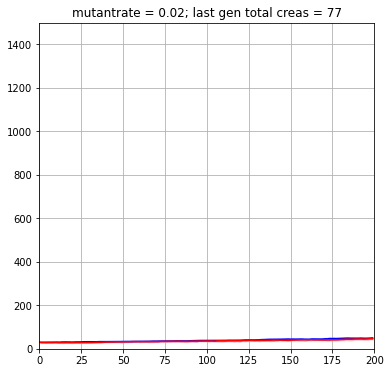

In [21]:
simulation(mutantvalue = 0.02)

Food : 200  n_creature : 100  n_gen :  200  maxtime :  50


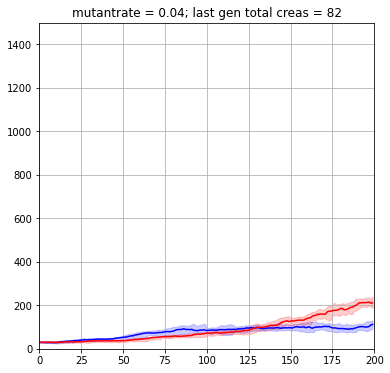

In [22]:
simulation(mutantvalue = 0.04)

Food : 200  n_creature : 100  n_gen :  200  maxtime :  50


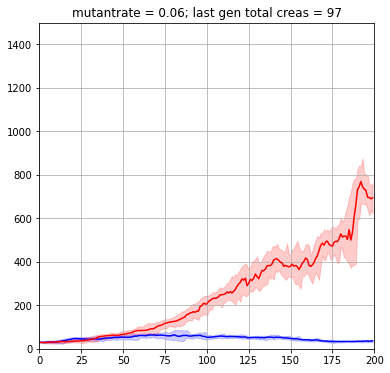

In [23]:
simulation(mutantvalue = 0.06)

Food : 200  n_creature : 100  n_gen :  200  maxtime :  50


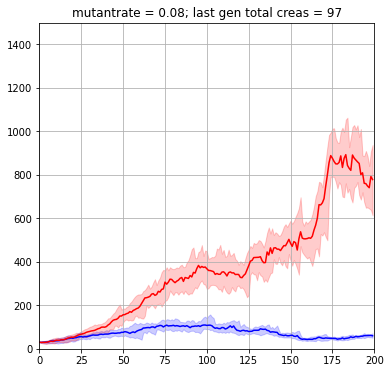

In [24]:
simulation(mutantvalue = 0.08)

Food : 200  n_creature : 100  n_gen :  200  maxtime :  50


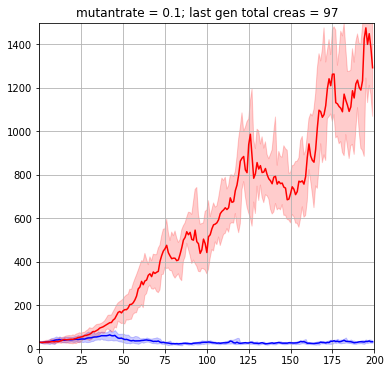

In [25]:
simulation(mutantvalue = 0.1)